In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
df_viz=pd.read_csv('socring_llm-visualiztion.csv')
df_dk=pd.read_csv('socring_llm-domains_knowledge.csv')
df_coding=pd.read_csv('socring_llm-coding.csv')
df_math=pd.read_csv('socring_llm-Mathematical_calculations.csv')

In [129]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# data=df4


# # Filter data for GPT4 LLM type, NCH and SCH
# gpt4_nch_data = data[(data['LLM'] == "GPT4") & (data['Type'] == "NCH")]
# gpt4_sch_data = data[(data['LLM'] == "GPT4") & (data['Type'] == "SCH")]

# # Calculating the frequency of each score in NCH and SCH datasets for GPT4
# gpt4_nch_score_counts = gpt4_nch_data['Score'].value_counts()
# gpt4_sch_score_counts = gpt4_sch_data['Score'].value_counts()

# # Creating a scatter plot with dot sizes proportional to the number of points with that value
# plt.figure(figsize=(10, 6))

# for score, count in gpt4_nch_score_counts.items():
#     plt.scatter(['NCH'], [score], s=count*5, color='blue', alpha=0.6,label='NCH' if score == gpt4_nch_score_counts.index[0] else "")

# for score, count in gpt4_sch_score_counts.items():
#     plt.scatter(['SCH'], [score], s=count*5, color='green', alpha=0.6,label='SCH' if score == gpt4_sch_score_counts.index[0] else "")

# # plt.title('Score Frequencies for GPT4 NCH vs SCH')
# # plt.xlabel('Type')
# # plt.ylabel('Score')
# # plt.xticks([0, 1], ['NCH', 'SCH'])
# # plt.legend()
# # plt.ylim(-1,15)
# # plt.grid(False)
# plt.show()


In [205]:
df_viz['Score'] = df_viz[['Clarity&Simplicity','Instructions', 'Data', 'Axis&LL', 'Color', 'Example', 'Interpretation','Software']].mean(axis=1)
df_dk['Score'] = df_dk[['Accuracy', 'Completeness','Relevance', 'Depth&Details', 'Clarity', 'Organization', 'Conciseness']].mean(axis=1)
df_coding['Score'] = df_coding[['Readability&Style', 'Correctness', 'Efficiency', 'Simplicity', 'Error Handling', 'Example ', ' IO']].mean(axis=1)
df_math['Score'] = df_math[['Score']].mean(axis=1)*10

In [207]:
np.unique(df_math.LLM)

array(['GPT4', 'Llama2', 'PaLM2'], dtype=object)

In [211]:
df_dk.head()

,Question,LLM,Type,Iteration,Accuracy,Completeness,Relevance,Depth&Details,Clarity,Organization,Conciseness,Score
0,Q1,GPT4,NCH,1,10,10,10,10,10,10,9,9.857143
1,Q1,GPT4,NCH,2,10,9,10,9,10,10,9,9.571429
2,Q1,GPT4,NCH,3,10,9,10,9,10,10,9,9.571429
3,Q1,GPT4,NCH,4,9,9,10,9,9,9,9,9.142857
4,Q1,GPT4,NCH,5,9,10,10,9,10,10,9,9.571429


In [221]:
df_math.loc[df_math['LLM']=='Llama2'].mean()

/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_2939/551008193.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_math.loc[df_math['LLM']=='Llama2'].mean()


Iteration      5.50
LLM answer    37.91
Score          5.00
dtype: float64

In [131]:
df_viz.columns

Index(['Question', 'LLM', 'Type', 'Iteration', 'Clarity&Simplicity',
       'Instructions', 'Data', 'Axis&LL', 'Color', 'Example', 'Interpretation',
       'Software', 'Score'],
      dtype='object')

In [132]:
df_viz['LLM'] = df_viz['LLM'].replace('PaLM2', 'Bard')
df_dk['LLM'] = df_dk['LLM'].replace('PaLM2', 'Bard')
df_coding['LLM'] = df_coding['LLM'].replace('PaLM2', 'Bard')
df_math['LLM'] = df_math['LLM'].replace('PaLM2', 'Bard')

In [133]:
max(df_math.Score)

10.0

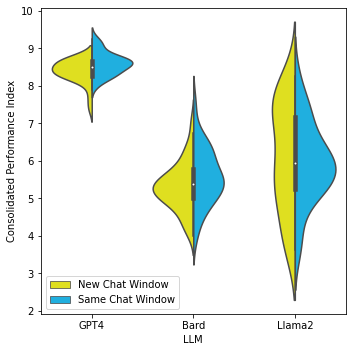

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
palette = ["yellow", "deepskyblue"]
sns.violinplot(data=df_viz, x='LLM', y='Score', hue='Type', split=True, palette=palette)
plt.ylabel('Consolidated Performance Index')
plt.xlabel('LLM')

handles, labels = plt.gca().get_legend_handles_labels()
# plt.gca().get_legend().remove()
labels_new = ['New Chat Window','Same Chat Window']
plt.legend(handles, labels_new,loc='lower left')
# plt.ylim(-5, 14.5)  # Assuming scores are on a 0-10 scale
plt.savefig('LLMvizcores.png',dpi=500)
plt.tight_layout()
plt.show()

GPT4


/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_86873/600871749.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Score'] = df_dk['Score']
/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_86873/600871749.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cs_data = data.groupby(['LLM', 'Type', 'Iteration']).mean().reset_index()


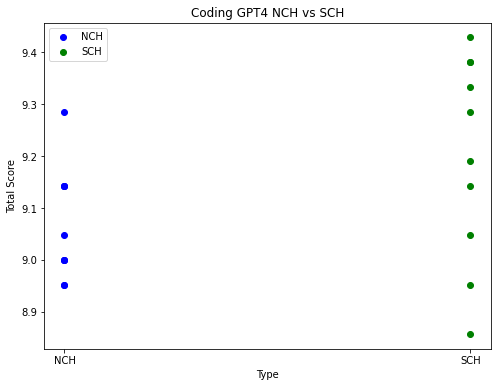

Llama2


/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_86873/600871749.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Score'] = df_dk['Score']
/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_86873/600871749.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cs_data = data.groupby(['LLM', 'Type', 'Iteration']).mean().reset_index()


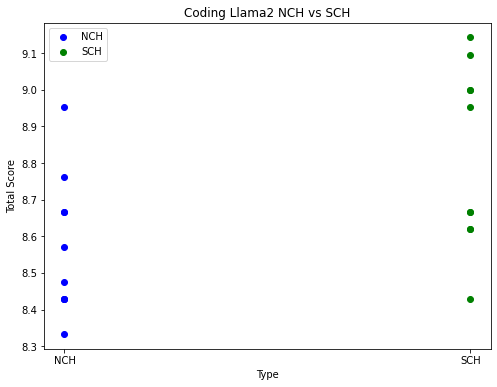

PaLM2


/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_86873/600871749.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Score'] = df_dk['Score']
/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_86873/600871749.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cs_data = data.groupby(['LLM', 'Type', 'Iteration']).mean().reset_index()


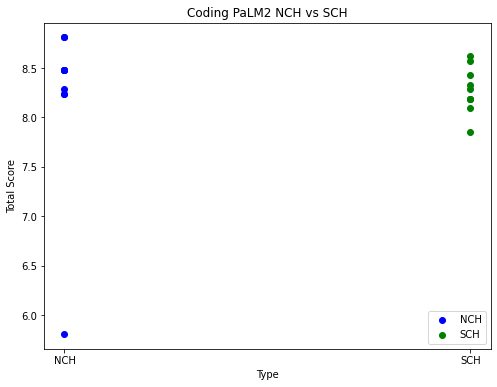

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataa
# for df in [df_dk,df_viz,df_coding,df_math]:
for LLM in np.unique(df_dk.LLM):
    print(LLM)
    
    data=df_coding[df_coding.LLM==LLM]

    data['Total Score'] = df_dk['Score']
    cs_data = data.groupby(['LLM', 'Type', 'Iteration']).mean().reset_index()

    # data['Total Score'] =data[['Score']].mean(axis=1)*10

    # Separate data based on Type (NCH and SCH)
    nch_data = cs_data[cs_data['Type'] == "NCH"]
    sch_data = cs_data[cs_data['Type'] == "SCH"]

    # Creating categorical labels for NCH and SCH
    nch_x = np.full(len(nch_data), 'NCH')
    sch_x = np.full(len(sch_data), 'SCH')

    # Plotting a scatter plot with NCH and SCH on the x-axis
    plt.figure(figsize=(8, 6))
    plt.scatter(nch_x, nch_data['Total Score'], color='blue', label='NCH')
    plt.scatter(sch_x, sch_data['Total Score'], color='green', label='SCH')

    plt.title('Coding ' + LLM + ' NCH vs SCH')
    plt.xlabel('Type')
    plt.ylabel('Total Score')
    plt.xticks([0, 1], ['NCH', 'SCH'])  # Set x-ticks to NCH and SCH
    plt.legend()
    plt.grid(False)
    plt.savefig('Coding ' + LLM + ' NCH vs SCH.png',dpi=300)
    plt.show()


dk
      LLM Type  Iteration  Accuracy  Completeness  Relevance  Depth&Details  \
0    GPT4  NCH        5.5  9.133333      8.633333   9.633333       8.400000   
1    GPT4  SCH        5.5  9.400000      8.866667   9.766667       8.366667   
2  Llama2  NCH        5.5  8.466667      8.733333   9.066667       8.500000   
3  Llama2  SCH        5.5  8.966667      8.966667   9.300000       8.800000   
4   PaLM2  NCH        5.5  8.300000      7.966667   8.800000       7.500000   

    Clarity  Organization  Conciseness     Score  
0  9.300000      9.466667     8.900000  9.066667  
1  9.500000      9.600000     8.900000  9.200000  
2  8.566667      8.700000     7.966667  8.571429  
3  8.766667      8.766667     8.166667  8.819048  
4  8.500000      8.333333     8.066667  8.209524  


/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_86873/113841494.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = df.groupby(['LLM', 'Type']).mean().reset_index()


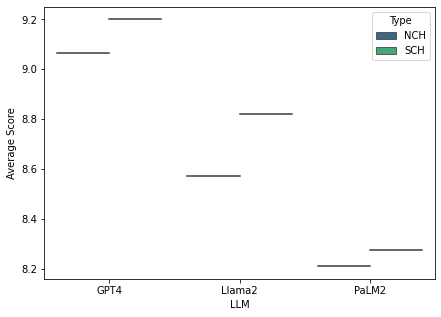

viz
      LLM Type  Iteration  Clarity&Simplicity  Instructions      Data  \
0    GPT4  NCH        5.5            8.833333      8.966667  7.900000   
1    GPT4  SCH        5.5            8.966667      9.100000  8.200000   
2  Llama2  NCH        5.5            7.233333      7.266667  6.300000   
3  Llama2  SCH        5.5            7.033333      7.233333  5.866667   
4   PaLM2  NCH        5.5            7.133333      6.866667  5.866667   

    Axis&LL     Color   Example  Interpretation  Software     Score  
0  8.400000  7.733333  8.833333        7.933333  8.466667  8.383333  
1  8.633333  7.966667  9.200000        8.033333  8.633333  8.591667  
2  6.866667  5.666667  4.133333        6.633333  4.766667  6.108333  
3  7.066667  6.233333  3.200000        6.866667  4.100000  5.950000  
4  7.100000  5.900000  1.100000        6.700000  1.800000  5.308333  


/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_86873/113841494.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = df.groupby(['LLM', 'Type']).mean().reset_index()


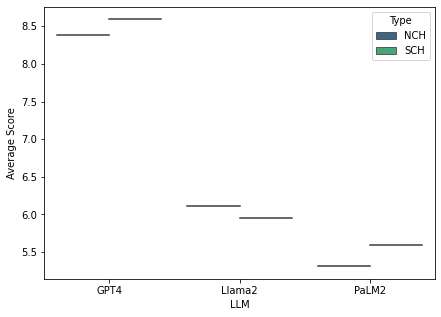

coding
      LLM Type  Iteration  Readability&Style  Correctness  Efficiency  \
0    GPT4  NCH        5.5               8.94         9.02        8.60   
1    GPT4  SCH        5.5               8.42         8.90        8.50   
2  Llama2  NCH        5.5               6.86         4.54        5.20   
3  Llama2  SCH        5.5               6.84         4.44        5.22   
4   PaLM2  NCH        5.5               8.48         7.86        7.66   

   Simplicity  Error Handling  Example     IO     Score  
0        8.96            6.14      9.10  8.96  8.531429  
1        8.92            6.74      9.16  8.86  8.500000  
2        6.02            3.62      5.30  5.96  5.357143  
3        5.52            3.48      5.80  6.58  5.411429  
4        8.58            5.72      8.00  8.62  7.845714  


/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_86873/113841494.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = df.groupby(['LLM', 'Type']).mean().reset_index()


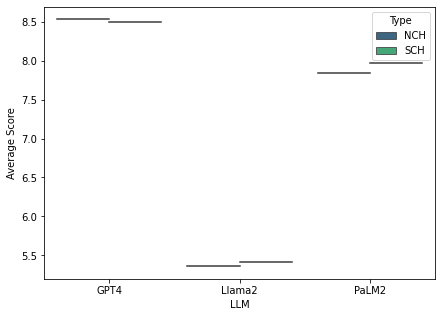

math
      LLM Type  Iteration  LLM answer  Score
0    GPT4  NCH        5.5       28.20    9.3
1    GPT4  SCH        5.5       25.80    9.6
2  Llama2  NCH        5.5       39.42    4.9
3  Llama2  SCH        5.5       36.40    5.1
4   PaLM2  NCH        5.5       25.00    9.6


/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_86873/113841494.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = df.groupby(['LLM', 'Type']).mean().reset_index()


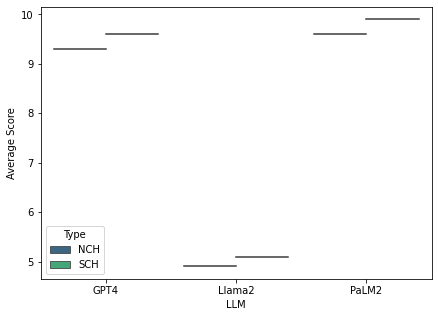

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_dk, df_viz, df_coding, and df_math are defined elsewhere
# Mapping dataframes to their types
df_types = {'dk': df_dk, 'viz': df_viz, 'coding': df_coding, 'math': df_math}

for df_type, df in df_types.items():
    print(df_type)
    
    # Here we don't want to group by 'Iteration' if we are plotting a violin plot
    # because we want to see all the data points. So we group only by 'LLM' and 'Type'
    average_scores = df.groupby(['LLM', 'Type']).mean().reset_index()

    # Check the data
    print(average_scores.head())

    # Plotting the average scores with violin plot
    plt.figure(figsize=(7, 5))
    sns.violinplot(x='LLM', y='Score', hue='Type', data=average_scores, palette='viridis', split=True)
    
    plt.ylabel('Average Score')
    plt.xlabel('LLM')
    plt.legend(title='Type')
#     plt.ylim(0,10)
    plt.savefig(f'{df_type}_score.png', dpi=300)  # Save with df type in filename
    plt.show()


In [154]:
0.336354+0.688980+0.367263+0.388676

1.7812729999999999

In [155]:
0.290454+0.466757+0.317927+0.222970

1.298108

In [156]:
(1.7812729999999999-1.298108)/1.298108

0.3722070890865782

In [153]:
for df in (df_viz, df_math, df_coding, df_dk):
    consistency_data = df.groupby(['LLM', 'Type', 'Iteration']).mean().reset_index()
    consistency_std = consistency_data.groupby(['LLM', 'Type']).std().reset_index()
    consistency_std[['LLM', 'Type', 'Score']]
    print(consistency_std.groupby('Type')['Score'].mean())

Type
NCH    0.336354
SCH    0.290454
Name: Score, dtype: float64
Type
NCH    0.688980
SCH    0.466757
Name: Score, dtype: float64
Type
NCH    0.367263
SCH    0.317927
Name: Score, dtype: float64
Type
NCH    0.388676
SCH    0.222970
Name: Score, dtype: float64


/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_2939/415387350.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consistency_data = df.groupby(['LLM', 'Type', 'Iteration']).mean().reset_index()
/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_2939/415387350.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consistency_data = df.groupby(['LLM', 'Type', 'Iteration']).mean().reset_index()
/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_2939/415387350.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

In [152]:
consistency_std.groupby('Type')['Score'].mean()

Type
NCH    0.688980
SCH    0.466757
Name: Score, dtype: float64

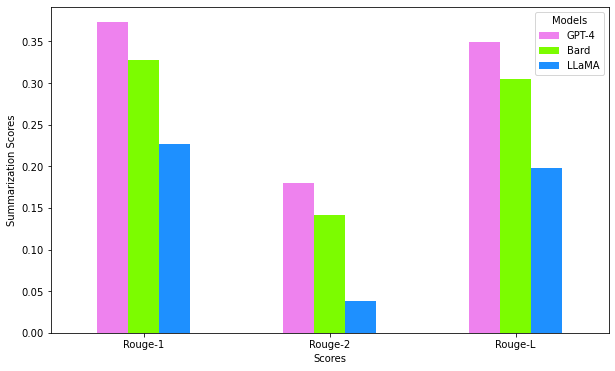

In [190]:
import pandas as pda
import matplotlib.pyplot as plt

data = {
    'Scores': ['Rouge-1', 'Rouge-2', 'Rouge-L'],
    'GPT-4': [0.373, 0.180, 0.349],
    'Bard': [0.327, 0.141, 0.305],
    'LLaMA': [0.227, 0.038, 0.198]
}

df = pd.DataFrame(data)
df.set_index('Scores', inplace=True)
colors = ["violet",'lawngreen', "dodgerblue" ]
df.plot(kind='bar', figsize=(10, 6),color=colors)
# plt.title('Scores Comparison')
plt.ylabel('Summarization Scores')
# plt.xlabel('Metrics')
plt.legend(title='Models', loc='upper right')
plt.xticks(rotation=0)
plt.savefig('rouge.png',dpi=500)

plt.show()


In [ ]:
df=pd.DataFrame()
df={"Scores:"
GPT-4
Bard
LLaMA
Rouge-1
0.373
0.327
0.227
Rouge-2
0.180
0.141
0.038
Rouge-L
0.349
0.305
0.198



In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping dataframes to their types
# df_types = {'dk': df_dk, 'viz': df_viz, 'coding': df_coding, 'math': df_math}
df_types = {'dk': df_dk}
for df_type, df in df_types.items():
    print(df_type)
    consistency_data = df.groupby(['LLM', 'Type', 'Iteration']).mean().reset_index()
    consistency_std = consistency_data.groupby(['LLM', 'Type']).std().reset_index()
    consistency_std.head()
#     plt.figure(figsize=(7, 5))
#     sns.barplot(x='LLM', y='Score', hue='Type', data=consistency_std, palette='viridis')

#     plt.ylabel('Standard Deviation')
#     plt.xlabel('LLM')
#     plt.legend(title='Type')
#     print(f'{df_type}_sd.png')
# #     plt.savefig(f'{df_type}_sd.png', dpi=300)  # Save with df type in filename
#     plt.ylim(0,1)
#     plt.show()

#     average_scores = df.groupby(['LLM', 'Type']).mean().reset_index()

#     # Plotting the average scores
#     plt.figure(figsize=(7, 5))
#     sns.barplot(x='LLM', y='Score', hue='Type', data=average_scores, palette='viridis')
#     plt.ylabel('Average Score')
#     plt.xlabel('LLM')
#     plt.legend(title='Type')
#     plt.ylim(0,10)
# #     plt.savefig(f'{df_type}_score.png', dpi=300)  # Save with df type in filename
#     plt.show()


dk


/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_2939/3544251855.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consistency_data = df.groupby(['LLM', 'Type', 'Iteration']).mean().reset_index()


In [100]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load your data
# df_data = df2

# # Compute the average score for each row across score columns
# score_columns = ['Accuracy', 'Completeness', 'Relevance', 'Depth&Details', 'Clarity', 'Organization', 'Conciseness']
# df_data['Average_Score'] = df_data[score_columns].mean(axis=1)

# # Filter for 'NCH' and 'SCH' types, ensuring data for 20 iterations
# df_nch_sch_iterations = df_data[(df_data['Type'].isin(['NCH', 'SCH'])) & (df_data['Iteration'] <= 20)]

# # Pivot and melt the DataFrame for the required plot structure
# pivot_df = df_nch_sch_iterations.pivot_table(index=['LLM', 'Iteration'], columns='Type', values='Average_Score').reset_index()
# melted_df = pivot_df.melt(id_vars=['LLM', 'Iteration'], value_vars=['NCH', 'SCH'], var_name='Type', value_name='Average_Score')

# # Unique LLM types in the dataset
# llm_types = melted_df['LLM'].unique()

# # Creating separate scatter plots for each LLM
# plt.figure(figsize=(10, 18))

# for i, llm in enumerate(llm_types, 1):
#     plt.subplot(len(llm_types), 1, i)  # Creating a subplot for each LLM
#     sns.scatterplot(data=melted_df[melted_df['LLM'] == llm], x='Type', y='Average_Score', hue='LLM', palette='Set2', marker='o')
#     plt.title(f'Comparison of NCH and SCH Scores for {llm}')
#     plt.xlabel('Type')
#     plt.ylabel('Average Score')
#     plt.grid(False)
#     plt.legend(title='LLM', bbox_to_anchor=(1.05, 1), loc=2)

# plt.tight_layout()
# plt.show()



In [104]:
df1.head()

,Question,LLM,Type,Iteration,Clarity&Simplicity,Instructions,Data,Axis&LL,Color,Example,Interpretation,Software,Score
0,Q3,GPT4,NCH,1,9,9,8,8,8,9,7,9,8.375
1,Q3,GPT4,NCH,2,9,9,8,9,8,9,8,8,8.500
2,Q3,GPT4,NCH,3,9,9,8,9,8,10,7,9,8.625
3,Q3,GPT4,NCH,4,9,9,8,9,9,9,8,9,8.750
4,Q3,GPT4,NCH,5,8,9,7,7,7,8,7,8,7.625


In [22]:
import pandas as pd
from scipy import stats

# Let's assume 'df3' is your DataFrame and 'Score' is the column with the data
# We'll conduct an ANOVA test for the 'Score' across different 'LLM' and 'Type' combinations

# First, we create a list of score data for each group
groups = df4.groupby(['LLM', 'Type'])['Score'].apply(list)

# Perform the ANOVA test
f_value, p_value = stats.f_oneway(*groups)

print(f"ANOVA test results: F={f_value}, p={p_value}")


ANOVA test results: F=51.80331491712704, p=1.3708764046086623e-44


In [23]:
# Conducting t-tests for each LLM
for llm in df2['LLM'].unique():
    group1 = df4[(df4['LLM'] == llm) & (df4['Type'] == 'NCH')]['Score']
    group2 = df4[(df4['LLM'] == llm) & (df4['Type'] == 'SCH')]['Score']
    
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)  # Welch's t-test for unequal variances
    print(f"{llm} NCH vs SCH: t-statistic={t_stat}, p-value={p_val}")


GPT4 NCH vs SCH: t-statistic=-0.9278305692406267, p-value=0.35470019436599587
PaLM2 NCH vs SCH: t-statistic=-1.3582048803087177, p-value=0.1764814560124342
Llama2 NCH vs SCH: t-statistic=-0.2814812474696498, p-value=0.7786352644635471


In [49]:
df4.head()

,Question,LLM,Type,Iteration,LLM answer,Score
0,Q1,GPT4,NCH,1,25.0,10.0
1,Q1,GPT4,NCH,2,25.0,10.0
2,Q1,GPT4,NCH,3,33.0,0.0
3,Q1,GPT4,NCH,4,25.0,10.0
4,Q1,GPT4,NCH,5,33.0,0.0


In [51]:
df4.groupby(['LLM', 'Type']).mean().reset_index()
df4.shape

/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_5784/2494402493.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4.groupby(['LLM', 'Type']).mean().reset_index()


(600, 6)

In [50]:
df4.head()

,Question,LLM,Type,Iteration,LLM answer,Score
0,Q1,GPT4,NCH,1,25.0,10.0
1,Q1,GPT4,NCH,2,25.0,10.0
2,Q1,GPT4,NCH,3,33.0,0.0
3,Q1,GPT4,NCH,4,25.0,10.0
4,Q1,GPT4,NCH,5,33.0,0.0


In [95]:
consistency_data = df3.groupby(['LLM', 'Type', 'Iteration']).mean().reset_index()
consistency_std = consistency_data.groupby(['LLM', 'Type']).std().reset_index()
consistency_data.head(n=100)

/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_5784/2763216534.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consistency_data = df3.groupby(['LLM', 'Type', 'Iteration']).mean().reset_index()


,LLM,Type,Iteration,Readability&Style,Correctness,Efficiency,Simplicity,Error Handling,Example,IO,Score
0,GPT4,NCH,1,8.4,8.8,8.6,9.2,6.2,8.8,9.0,8.428571
1,GPT4,NCH,2,9.0,8.8,8.2,8.8,5.4,9.0,8.8,8.285714
2,GPT4,NCH,3,9.0,9.0,8.6,9.2,6.0,9.0,9.2,8.571429
3,GPT4,NCH,4,8.8,9.4,8.8,8.8,6.4,9.4,8.8,8.628571
4,GPT4,NCH,5,9.0,9.0,8.8,8.8,6.0,9.2,9.2,8.571429
5,GPT4,NCH,6,9.0,9.0,8.0,8.8,6.2,8.8,8.8,8.371429
6,GPT4,NCH,7,9.4,9.4,8.8,9.2,5.8,9.6,9.4,8.800000
7,GPT4,NCH,8,9.0,8.8,8.8,9.0,6.2,8.8,9.0,8.514286
8,GPT4,NCH,9,8.8,8.8,8.6,8.8,6.0,9.0,8.6,8.371429
9,GPT4,NCH,10,9.0,9.2,8.8,9.0,7.2,9.4,8.8,8.771429


In [75]:
consistency_std

,LLM,Type,Iteration,Readability&Style,Correctness,Efficiency,Simplicity,Error Handling,Example,IO,Score
0,GPT4,NCH,3.02765,0.250333,0.239444,0.282843,0.183787,0.462361,0.286744,0.245855,0.171534
1,GPT4,SCH,3.02765,0.274064,0.301846,0.253859,0.285968,0.542013,0.263312,0.353396,0.145219
2,Llama2,NCH,3.02765,0.298887,0.693141,0.760117,0.656252,0.635610,0.915302,0.893433,0.586817
3,Llama2,SCH,3.02765,0.469515,0.809938,0.537070,0.694102,0.590292,0.858940,0.861265,0.579812
4,PaLM2,NCH,3.02765,0.214994,0.660303,0.516828,0.239444,0.559365,0.516398,0.289828,0.343439
5,PaLM2,SCH,3.02765,0.220101,0.469515,0.424264,0.250333,0.569210,0.499333,0.402216,0.228750


/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_5784/1111999924.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consistency_data = df2.groupby(['LLM', 'Type', 'Iteration']).mean().reset_index()


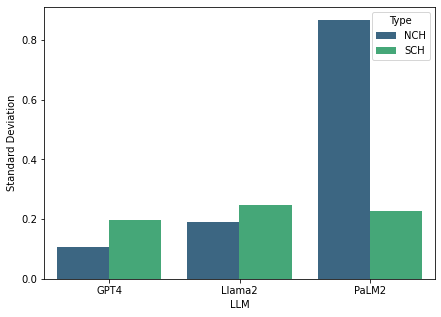

/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_5784/1111999924.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = df2.groupby(['LLM', 'Type']).mean().reset_index()


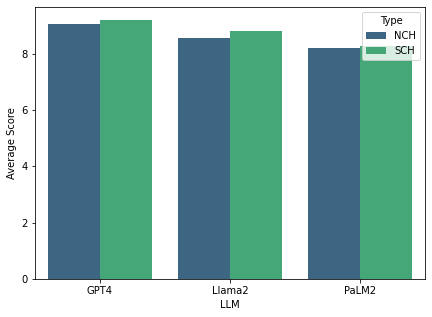

In [97]:
df1.head()

,Iteration,Type,LLM,Clarity&Simplicity,Instructions,Data,Axis&LL,Color,Example,Interpretation,Software,Score
0,1,NCH,GPT4,9.000000,9.000000,8.000000,8.000000,8.000000,9.000000,7.666667,9.000000,8.458333
1,1,NCH,Llama2,7.666667,7.666667,7.000000,7.333333,5.666667,6.000000,7.000000,6.000000,6.791667
2,1,NCH,PaLM2,7.000000,6.333333,5.333333,7.333333,7.000000,1.000000,6.666667,2.666667,5.416667
3,1,SCH,GPT4,8.666667,9.000000,8.333333,8.333333,7.333333,9.000000,7.666667,9.000000,8.416667
4,1,SCH,Llama2,6.666667,6.666667,6.000000,7.000000,6.333333,3.333333,6.000000,4.333333,5.791667


In [103]:
df_viz=df_viz.groupby(['Iteration','Type','LLM']).mean().reset_index()
df_viz['Task']="Visualization"
df_viz=df_viz[['Task','LLM','Score']]

df_dk=df_dk.groupby(['Iteration','Type','LLM']).mean().reset_index()
df_dk['Task']="Domain Knowledge"
df_dk=df_dk[['Task','LLM','Score']]

df_coding=df_coding.groupby(['Iteration','Type','LLM']).mean().reset_index()
df_coding['Task']="Coding"
df_coding=df_coding[['Task','LLM','Score']]

df_math=df_math.groupby(['Iteration','Type','LLM']).mean().reset_index()
df_math['Task']="Mathematical Calculations"
df_math=df_math[['Task','LLM','Score']]

/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_2939/828184271.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_viz=df_viz.groupby(['Iteration','Type','LLM']).mean().reset_index()
/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_2939/828184271.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dk=df_dk.groupby(['Iteration','Type','LLM']).mean().reset_index()
/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_2939/828184271.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fal

In [6]:
df_coding.head()

,Task,LLM,Score
0,Coding,GPT4,8.428571
1,Coding,Llama2,5.200000
2,Coding,PaLM2,8.200000
3,Coding,GPT4,8.657143
4,Coding,Llama2,5.400000


In [7]:
df_coding.columns

Index(['Task', 'LLM', 'Score'], dtype='object')

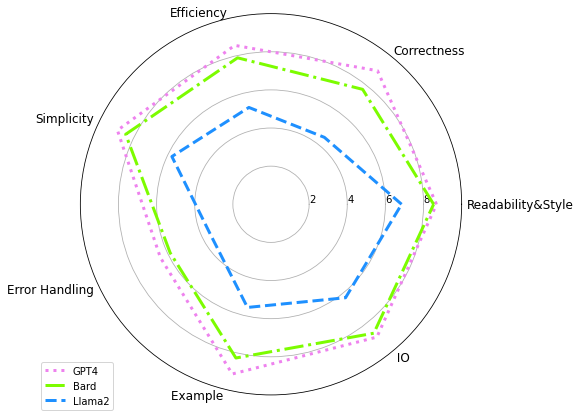

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
data = df_coding  
categories = ['Readability&Style', 'Correctness', 'Efficiency', 'Simplicity', 'Error Handling', 'Example ', ' IO']  # Removed extra space in 'Example ' and ' IO'
# data=df_dk
# categories= ['Accuracy', 'Completeness','Relevance', 'Depth&Details', 'Clarity', 'Organization', 'Conciseness']
# data=df_viz
# categories=['Clarity&Simplicity','Instructions', 'Data', 'Axis&LL', 'Color', 'Example', 'Interpretation','Software']

linestyle_map = {
    'GPT4': ':',
    'Llama2': '--',
    'PaLM2': '-.'
}

N = len(categories)
llm_types = data['LLM'].unique()
llm_values = {}
for llm in llm_types:
    llm_data = data[data['LLM'] == llm][categories].mean().tolist()
    llm_data += llm_data[:1]  # Repeat the first value to close the circle
    llm_values[llm] = llm_data
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
plt.xticks([])
for i, label in enumerate(categories):
    angle_rad = angles[i]
    if angle_rad <= pi/2 or angle_rad >= 3*pi/2:  # Right side of the plot
        ha = 'left'
        va = 'center'
    elif pi/2 < angle_rad < 3*pi/2:  # Left side of the plot
        ha = 'right'
        va = 'center'
    elif angle_rad == 0 or angle_rad == pi:  # Exactly at the top or bottom
        ha = 'center'
        va = 'bottom' if angle_rad == 0 else 'top'
    label_distance = 10.3  
    ax.text(angle_rad, label_distance, label, size=12, horizontalalignment=ha, verticalalignment=va, color='black')

ax.set_rlabel_position(0)
plt.yticks([2, 4, 6, 8], ["2", "4", "6", "8"], color="black", size=10)  # Adjust size for better readability
plt.ylim(0, 10)

color_map = {
    'GPT4': 'violet',  
    'Llama2': 'dodgerblue',
    'PaLM2': 'lawngreen'  
}

for llm, values in llm_values.items():
    ax.plot(angles, values, linewidth=3, linestyle=linestyle_map[llm], label=llm, color=color_map[llm])  # Increased linewidth
    ax.fill(angles, values, color=color_map[llm], alpha=0)  # Adjust alpha for more transparency

handles, labels = plt.gca().get_legend_handles_labels()
labels_new = [labels[0], 'Bard' , labels[2]]
plt.legend(handles, labels_new,loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=10)
plt.tight_layout()
plt.savefig('spider_coding.png',dpi=500)
plt.show()

In [50]:
df4_foc=df4.loc[ (df4.LLM=="GPT4") | (df4.LLM=="PaLM2")]

NameError: name 'df4' is not defined

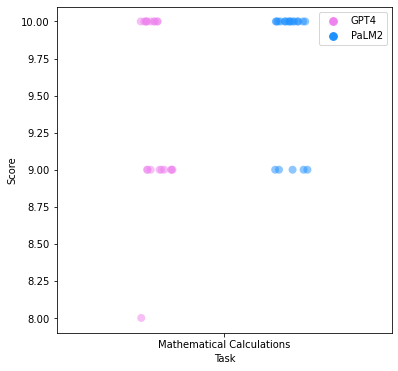

In [125]:
# Plot the boxplots with points overlaid
plt.figure(figsize=(6, 6))

# Create a boxplot with seaborn
# a=sns.boxplot(x='Task', y='Score', hue='LLM', data=df4_foc, 
#             palette=['violet', 'dodgerblue','lawngreen'], boxprops={'zorder': 2})

# a=sns.boxplot(x='Task', y='Score', hue='LLM', data=df4_foc, 
#             palette=['violet', 'dodgerblue','lawngreen'], fliersize=0,boxprops={'edgecolor':('black'),'facecolor':(1,1,1,0)},zorder=5)



# Overlay the points on the boxplot using stripplot
# Set zorder to 1 to draw the points below the boxplot lines, and increase marker size
sns.stripplot(x='Task', y='Score', hue='LLM', data=df4_foc, 
              palette=['violet', 'dodgerblue','lawngreen'], dodge=True, jitter=True, 
              alpha=0.5, zorder=1, size=8)

# Improve the legend so each model only appears once
handles, labels = plt.gca().get_legend_handles_labels()
# a.set_xlabel("X Label",fontsize=30)
# a.set_ylabel("Y Label",fontsize=20)
plt.legend(handles[0:3], labels[0:3])
a.set_ylim(7,10.5)
# plt.title('Comparison of Mean Scores by Category and Model with Dots')
# plt.tight_layout()
plt.savefig('math_zoomed.pdf', bbox_inches='tight',dpi=300)
plt.show()

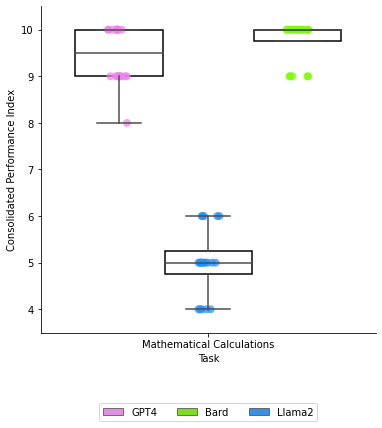

In [118]:
# Plot the boxplots with points overlaid
plt.figure(figsize=(6, 6))

# Create a boxplot with seaborn
# a=sns.boxplot(x='Task', y='Score', hue='LLM', data=df1, 
#             palette=['violet', 'dodgerblue','lawngreen'], boxprops={'zorder': 2})
a=sns.boxplot(x='Task', y='Score', hue='LLM', data=df_math, 
            palette=['violet', 'dodgerblue','lawngreen'], fliersize=0,boxprops={'edgecolor':('black'),'facecolor':(1,1,1,0)},zorder=5)
# Overlay the points on the boxplot using stripplot
# Set zorder to 1 to draw the points below the boxplot lines, and increase marker size
sns.stripplot(x='Task', y='Score', hue='LLM', data=df_math, 
              palette=['violet', 'dodgerblue','lawngreen'], dodge=True, jitter=True, 
              alpha=0.7, zorder=1, size=8)
sns.despine()
# Improve the legend so each model only appears once
handles, labels = plt.gca().get_legend_handles_labels()

handles_new = [handles[0], handles[2] , handles[1]]
labels_new = [labels[0], 'Bard' , labels[1]]
plt.legend(handles_new, labels_new, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.ylabel('Consolidated Performance Index')
a.set_ylim(3.5,10.5)
# plt.title('Comparison of Mean Scores by Category and Model with Dots')
plt.savefig('math.png', bbox_inches='tight',dpi=500)
plt.show()





In [40]:
df_viz['Task'].unique()

array(['Visualization'], dtype=object)

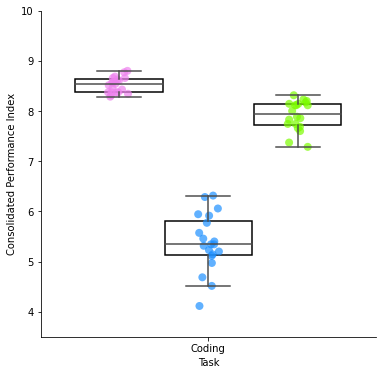

In [113]:
plt.figure(figsize=(6, 6))
task_categories = df_viz['LLM'].unique()
x_tick_positions = range(len(task_categories)) 
a=sns.boxplot(x='Task', y='Score', hue='LLM', data=df_coding, 
            palette=['violet', 'dodgerblue','lawngreen'], fliersize=0,boxprops={'edgecolor':('black'),'facecolor':(1,1,1,0)},zorder=5)

sns.stripplot(x='Task', y='Score', hue='LLM', data=df_coding, 
              palette=['violet', 'dodgerblue','lawngreen'], dodge=True, jitter=True, 
              alpha=0.7, zorder=1, size=8)
sns.despine()
handles, labels = plt.gca().get_legend_handles_labels()
handles_new = [handles[0], handles[2] , handles[1]]
labels_new = [labels[0], 'Bard' , labels[1]]
# plt.xticks(x_tick_positions, ['GPT', 'Bard', 'Llama'])
# plt.legend(handles_new, labels_new)
plt.legend().set_visible(False)
a.set_ylim(3.5,10)
plt.ylabel('Consolidated Performance Index')
# plt.title('Comparison of Mean Scores by Category and Model with Dots')
plt.savefig('coding.png', bbox_inches='tight',dpi=500)
plt.show()

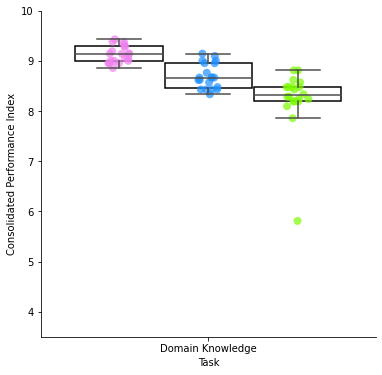

In [116]:
# Plot the boxplots with points overlaid
plt.figure(figsize=(6, 6))

# Create a boxplot with seaborn
# a=sns.boxplot(x='Task', y='Score', hue='LLM', data=df1, 
#             palette=['violet', 'dodgerblue','lawngreen'], boxprops={'zorder': 2})
a=sns.boxplot(x='Task', y='Score', hue='LLM', data=df_dk, 
            palette=['violet', 'dodgerblue','lawngreen'], fliersize=0,boxprops={'edgecolor':('black'),'facecolor':(1,1,1,0)},zorder=5)
# Overlay the points on the boxplot using stripplot
# Set zorder to 1 to draw the points below the boxplot lines, and increase marker size
sns.stripplot(x='Task', y='Score', hue='LLM', data=df_dk, 
              palette=['violet', 'dodgerblue','lawngreen'], dodge=True, jitter=True, 
              alpha=0.7, zorder=1, size=8)
sns.despine()
handles, labels = plt.gca().get_legend_handles_labels()
handles_new = [handles[0], handles[2] , handles[1]]
labels_new = [labels[0], 'Bard' , labels[1]]
# plt.legend(handles_new, labels_new)
plt.legend().set_visible(False)
a.set_ylim(3.5,10)
plt.ylabel('Consolidated Performance Index')
# plt.title('Comparison of Mean Scores by Category and Model with Dots')
plt.savefig('domain_knowledge.png', bbox_inches='tight',dpi=500)
plt.show()



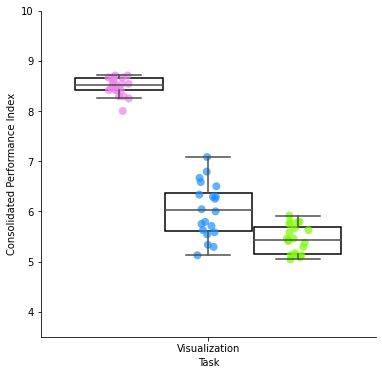

In [117]:
# Plot the boxplots with points overlaid
plt.figure(figsize=(6, 6))

# Create a boxplot with seaborn
# a=sns.boxplot(x='Task', y='Score', hue='LLM', data=df1, 
#             palette=['violet', 'dodgerblue','lawngreen'], boxprops={'zorder': 2})
a=sns.boxplot(x='Task', y='Score', hue='LLM', data=df_viz, 
            palette=['violet', 'dodgerblue','lawngreen'], fliersize=0,boxprops={'edgecolor':('black'),'facecolor':(1,1,1,0)},zorder=5)
# Overlay the points on the boxplot using stripplot
# Set zorder to 1 to draw the points below the boxplot lines, and increase marker size
sns.stripplot(x='Task', y='Score', hue='LLM', data=df_viz, 
              palette=['violet', 'dodgerblue','lawngreen'], dodge=True, jitter=True, 
              alpha=0.7, zorder=1, size=8)
sns.despine()
# handles, labels = plt.gca().get_legend_handles_labels()
# handles_new = [handles[0], handles[2] , handles[1]]
# labels_new = [labels[0], 'Bard' , labels[1]]
# print(labels_new)
# plt.legend(handles_new, labels_new)
plt.legend().set_visible(False)
a.set_ylim(3.5,10)
plt.ylabel('Consolidated Performance Index')
# plt.title('Comparison of Mean Scores by Category and Model with Dots')
plt.savefig('viz.png', bbox_inches='tight',dpi=500)
plt.show()


In [ ]:
# Plot the boxplots with points overlaid
plt.figure(figsize=(15, 6))

# Create a boxplot with seaborn
sns.boxplot(x='Task', y='Score', hue='LLM', data=df, 
            palette=['violet', 'dodgerblue','lawngreen'], boxprops={'zorder': 2})

# Overlay the points on the boxplot using stripplot
# Set zorder to 1 to draw the points below the boxplot lines, and increase marker size
sns.stripplot(x='Task', y='Score', hue='LLM', data=df, 
              palette=['violet', 'dodgerblue','lawngreen'], dodge=True, jitter=True, 
              alpha=1.0, zorder=1, size=6)

# Improve the legend so each model only appears once
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:3], labels[0:3], title='Model')

plt.title('Comparison of Mean Scores by Category and Model with Dots')
plt.show()


In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
from math import pi

# Load your data here
data = pd.read_csv('path_to_your_data.csv')

# Normalize the numerical data for the spider chart
num_data = data[['LLM Type', 'Accuracy', 'Error handling', 'One-hot encoding']].groupby('LLM Type').mean()
categories = num_data.columns.tolist()
N = len(categories)
norm_num_data = (num_data - num_data.min()) / (num_data.max() - num_data.min())

# Preparing angles for the spider chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Converting '# Iterations required' to string and replacing NaNs
data['# Iterations required'] = data['# Iterations required'].astype(str).replace('nan', 'Unknown')

# Setting up the grid for composite chart
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(2, 3, figure=fig)

# Spider Chart
ax = plt.subplot(gs[0, :], polar=True)
for index, row in norm_num_data.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=index)
    ax.fill(angles, values, alpha=0.4)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Bar Chart for 'Data imputation'
ax1 = plt.subplot(gs[1, 0])
sns.countplot(x='Data imputation', hue='LLM Type', data=data, ax=ax1)
ax1.set_title("Data Imputation by LLM Type")

# Bar Chart for 'model'
ax2 = plt.subplot(gs[1, 1])
sns.countplot(x='model', hue='LLM Type', data=data, ax=ax2)
ax2.set_title("Model by LLM Type")

# Bar Chart for '# Iterations required'
ax3 = plt.subplot(gs[1, 2])
sns.countplot(x='# Iterations required', hue='LLM Type', data=data, ax=ax3)
ax3.set_title("# Iterations Required by LLM Type")

plt.tight_layout()
plt.show()


TypeError: unhashable type: 'list'

In [161]:
data.head()

,Model,iteration,Accuracy,Error handling,One-hot encoding,Data imputation,# Iterations required,model,Notes
0,GPT-4,1,81.0,10,10.0,median,1,RF,"Does not directly provide the code, have to pr..."
1,GPT-4,2,51.0,8,10.0,mean,5,RF,Multiple iterations required
2,GPT-4,3,89.0,10,10.0,mean,1,RF,NaN
3,GPT-4,4,84.2,10,10.0,mean,1,RF,NaN
4,GPT-4,5,53.2,10,10.0,median,2,LR,NaN


In [ ]:
data[]

In [202]:
data.loc[data['Model']=='GPT-4']

,Model,iteration,Accuracy,Error handling,One-hot encoding,Data imputation,# Iterations required,model,Notes
0,GPT-4,1,81.0,10,10.0,median,1,RF,"Does not directly provide the code, have to pr..."
1,GPT-4,2,51.0,8,10.0,mean,5,RF,Multiple iterations required
2,GPT-4,3,89.0,10,10.0,mean,1,RF,NaN
3,GPT-4,4,84.2,10,10.0,mean,1,RF,NaN
4,GPT-4,5,53.2,10,10.0,median,2,LR,NaN
5,GPT-4,6,53.0,10,10.0,mean,1,GB,NaN
6,GPT-4,7,52.0,10,10.0,mean,1,RF,NaN
7,GPT-4,8,48.9,10,10.0,median,1,RF,NaN
8,GPT-4,9,53.2,10,10.0,mean,1,RF,NaN
9,GPT-4,10,57.7,10,10.0,median,2,RF,NaN


In [198]:
np.unique(data.loc[data['Model']=='Llama']['model'],return_counts=True)

TypeError: '<' not supported between instances of 'float' and 'str'

In [191]:
data = pd.read_csv('socring_llm - ML (1).csv')
data.groupby(['Model']).mean()

/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_2939/2617204718.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Model']).mean()


,iteration,Accuracy,Error handling,One-hot encoding,# Iterations required
Model,,,,,
GPT-4,5.5,62.32,9.8,10.00,1.6
Llama,5.5,0.00,0.8,0.00,10.0
Palm-2,5.5,0.00,0.0,1.25,10.0


/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_2939/1392816905.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = plt.subplot(gs[1, 1])


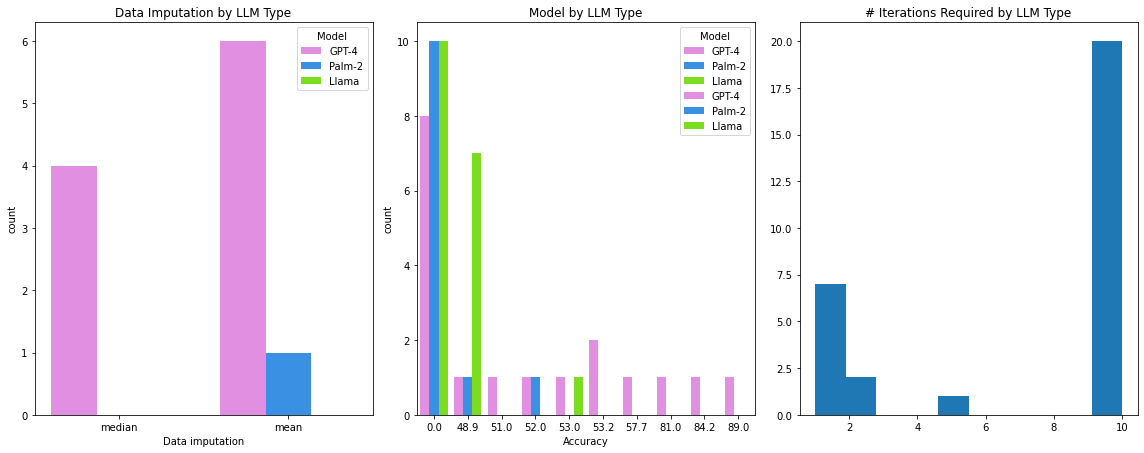

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
from math import pi

# Load your data here
data = pd.read_csv('socring_llm - ML (1).csv')
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(2,3, figure=fig)
colors = ["violet", "dodgerblue","lawngreen"]

ax1 = plt.subplot(gs[1, 0])
sns.countplot(x='Data imputation', hue='Model', data=data, ax=ax1,palette=colors)
ax1.set_title("Data Imputation by LLM Type")

ax2 = plt.subplot(gs[1, 1])
sns.countplot(x='model', hue='Model', data=data, ax=ax2,palette=colors)
ax2.set_title("Model by LLM Type")

ax3 = plt.subplot(gs[1, 2])
plt.hist(data['# Iterations required'])
ax3.set_title("# Iterations Required by LLM Type")

ax4 = plt.subplot(gs[1, 1])
sns.countplot(x='Accuracy', hue='Model', data=data, ax=ax2,palette=colors)
ax4.set_title("Model by LLM Type")
plt.tight_layout()
plt.show()

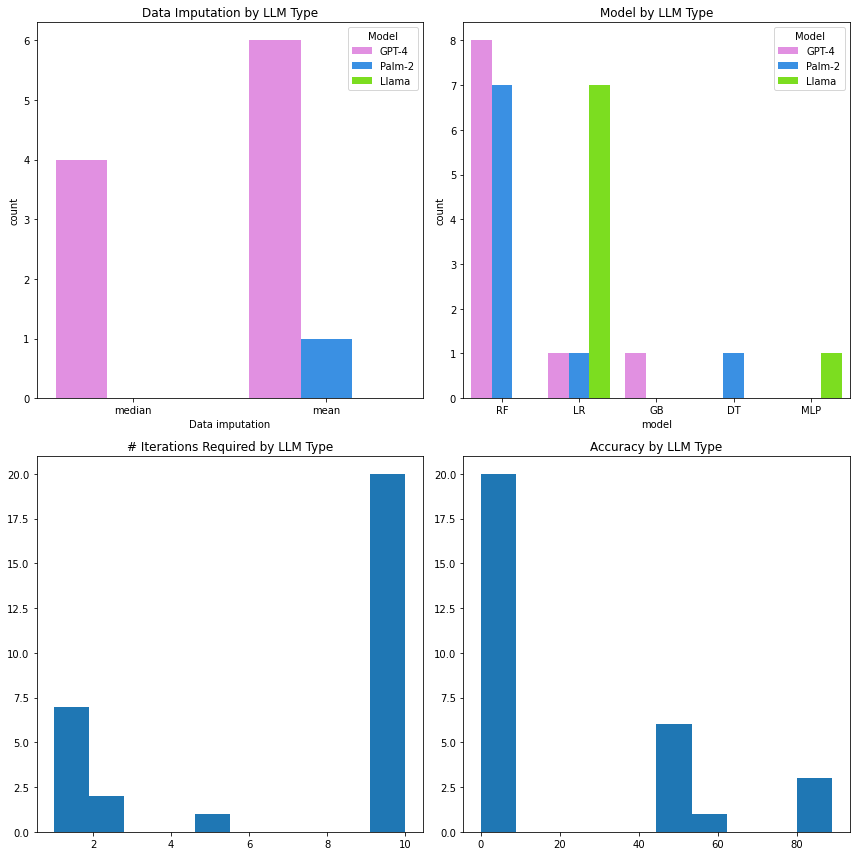

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
from math import pi

# Load your data here
data = pd.read_csv('socring_llm - ML (1).csv')
fig = plt.figure(figsize=(12, 12))  # Adjusted for a square layout
gs = gridspec.GridSpec(2, 2, figure=fig)  # Changed to 2x2 grid

colors = ["violet", "dodgerblue", 'lawngreen']

# First subplot
ax1 = plt.subplot(gs[0, 0])
sns.countplot(x='Data imputation', hue='Model', data=data, ax=ax1, palette=colors)
ax1.set_title("Data Imputation by LLM Type")

# Second subplot
ax2 = plt.subplot(gs[0, 1])
sns.countplot(x='model', hue='Model', data=data, ax=ax2, palette=colors)
ax2.set_title("Model by LLM Type")

# Third subplot
ax3 = plt.subplot(gs[1, 0])
# Ensure '# Iterations required' is numeric or categorical for histogram
# Convert if necessary, e.g., data['# Iterations required'] = pd.to_numeric(data['# Iterations required'], errors='coerce')
plt.hist(data['# Iterations required'])
ax3.set_title("# Iterations Required by LLM Type")

# Fourth subplot
ax4 = plt.subplot(gs[1, 1])
plt.hist(data['Accuracy'])
ax4.set_title("Accuracy by LLM Type")

plt.tight_layout()
plt.show()


/Users/macos/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


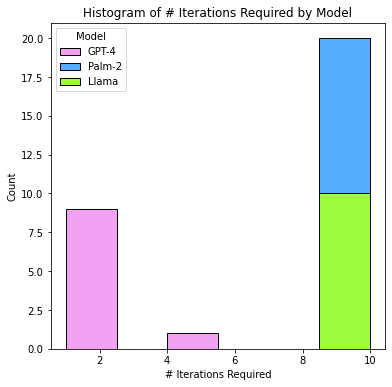

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your data
data = pd.read_csv('socring_llm - ML (1).csv')

# Define your color scheme
palette = ["violet", "dodgerblue", "lawngreen"]

# Plot
plt.figure(figsize=(6, 6))
sns.histplot(data, x='# Iterations required', hue='Model', palette=palette, multiple="stack")
plt.title('Histogram of # Iterations Required by Model')
plt.xlabel('# Iterations Required')
plt.ylabel('Count')
plt.show()


/Users/macos/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


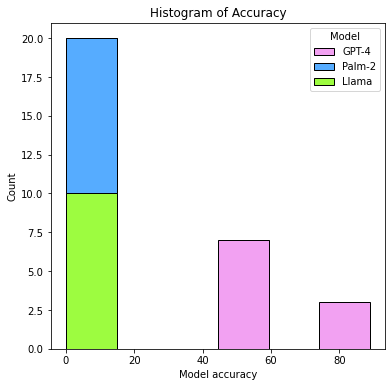

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your data
data = pd.read_csv('socring_llm - ML (1).csv')

# Define your color scheme
palette = ["violet", "dodgerblue", "lawngreen"]

# Plot
plt.figure(figsize=(6, 6))
sns.histplot(data, x='Accuracy', hue='Model', palette=palette, multiple="stack")
plt.title('Histogram of Accuracy')
plt.xlabel('Model accuracy')
plt.ylabel('Count')
plt.show()